In [1]:
import pandas as pd


In [2]:
A=pd.read_csv("F:/data science workshop/DATA-SET/data/Credit.csv")


In [3]:
A.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
import seaborn as sb

In [5]:
import matplotlib.pyplot as plt

In [25]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [26]:
cat

['Gender', 'Student', 'Married', 'Ethnicity']

In [8]:
B=pd.DataFrame(A[cat])

In [9]:
B

,Gender,Student,Married,Ethnicity
0,Male,No,Yes,Caucasian
1,Female,Yes,Yes,Asian
2,Male,No,No,Asian
3,Female,No,No,Asian
4,Male,No,Yes,Caucasian
...,...,...,...,...
395,Male,No,Yes,Caucasian
396,Male,No,No,African American
397,Female,No,Yes,Caucasian
398,Male,No,Yes,Caucasian


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
B=B.apply(le.fit_transform)

In [14]:
B

,Gender,Student,Married,Ethnicity
0,0,0,1,2
1,1,1,1,1
2,0,0,0,1
3,1,0,0,1
4,0,0,1,2
...,...,...,...,...
395,0,0,1,2
396,0,0,0,0
397,1,0,1,2
398,0,0,1,2


In [15]:
B=B.drop(labels="Married",axis=1)

In [16]:
B

,Gender,Student,Ethnicity
0,0,0,2
1,1,1,1
2,0,0,1
3,1,0,1
4,0,0,2
...,...,...,...
395,0,0,2
396,0,0,0
397,1,0,2
398,0,0,2


In [21]:
A=A.drop(labels=["ID"],axis=1)

In [22]:
A

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [27]:
B=B.join(A[con])

In [28]:
B

,Gender,Student,Ethnicity,Income,Limit,Rating,Cards,Age,Education,Balance
0,0,0,2,14.891,3606,283,2,34,11,333
1,1,1,1,106.025,6645,483,3,82,15,903
2,0,0,1,104.593,7075,514,4,71,11,580
3,1,0,1,148.924,9504,681,3,36,11,964
4,0,0,2,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,12.096,4100,307,3,32,13,560
396,0,0,0,13.364,3838,296,5,65,17,480
397,1,0,2,57.872,4171,321,5,67,12,138
398,0,0,2,37.728,2525,192,1,44,13,0


In [29]:
B.columns


Index(['Gender', 'Student', 'Ethnicity', 'Income', 'Limit', 'Rating', 'Cards',
       'Age', 'Education', 'Balance'],
      dtype='object')

In [36]:
X=B[['Gender', 'Student', 'Ethnicity', 'Income', 'Limit', 'Rating', 'Cards',
       'Age', 'Education', 'Balance']]

In [37]:
Y=A[["Married"]]

In [64]:
Y=Y.apply(le.fit_transform)

In [38]:
A.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

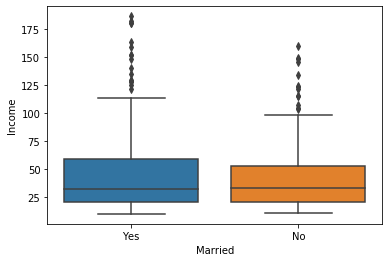

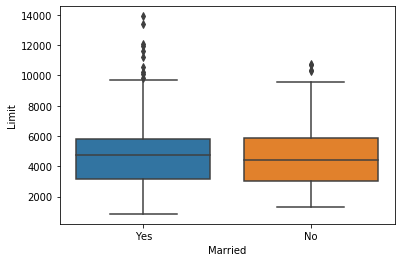

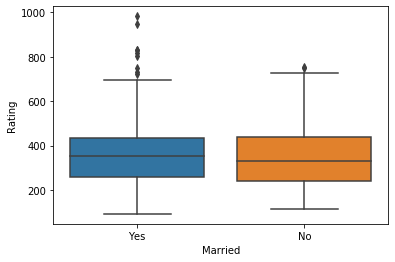

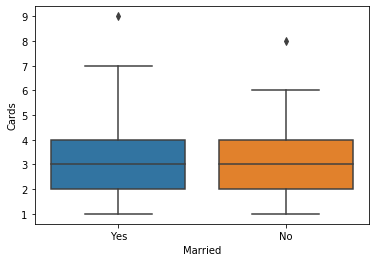

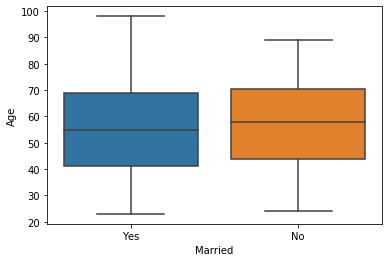

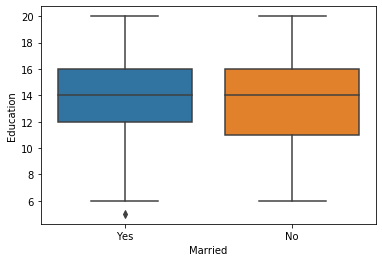

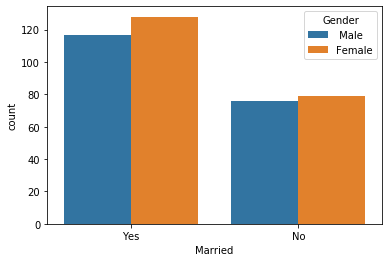

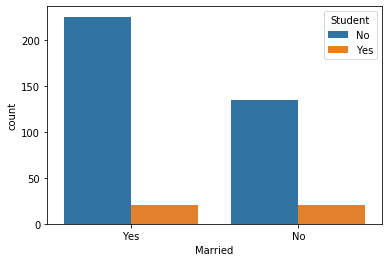

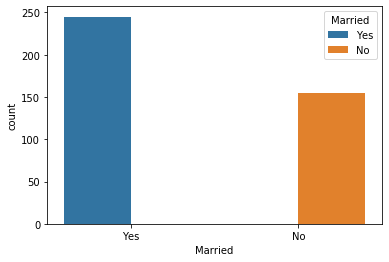

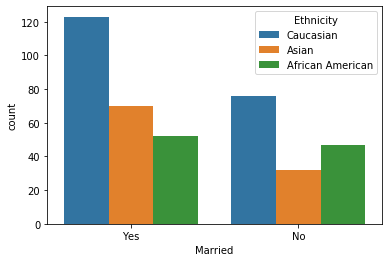

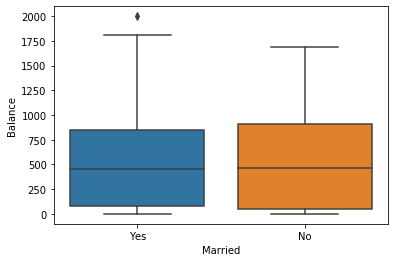

In [65]:
for i in A.columns:
    if(A[i].dtypes=="object"):
        sb.countplot(A.Married,hue=A[i])
        plt.show()
    else:
        sb.boxplot(A.Married,A[i])
        plt.show()

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [67]:
X.head(2)

,Gender,Student,Ethnicity,Income,Limit,Rating,Cards,Age,Education,Balance
0,0,0,2,14.891,3606,283,2,34,11,333
1,1,1,1,106.025,6645,483,3,82,15,903


In [68]:
Y.head()

,Married
0,1
1,1
2,0
3,0
4,1


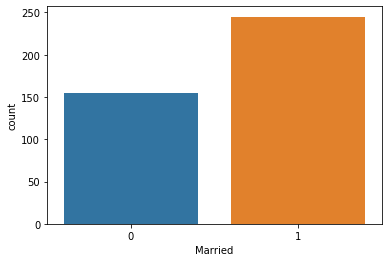

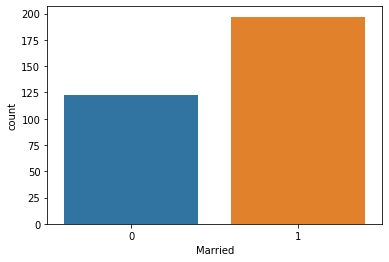

In [69]:
sb.countplot(Y.Married)
plt.show()
sb.countplot(ytrain.Married)
plt.show()

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
for i in range(2,30):
    rc=RandomForestClassifier(n_estimators=i)
    model=rc.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    from sklearn.metrics import accuracy_score
    print(i,accuracy_score(ytest,pred))

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning

2 0.425
3 0.55
4 0.5375
5 0.625
6 0.475
7 0.5625
8 0.5375
9 0.5625
10 0.625
11 0.5125
12 0.5125
13 0.525


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning

14 0.5125
15 0.5625
16 0.5625
17 0.5375
18 0.55


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning

19 0.55
20 0.5125
21 0.575
22 0.5
23

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning

 0.6
24 0.575
25 0.575
26

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


 0.55
27 0.6125
28 0.575
29 0.5625


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators=17)
model2=rfc1.fit(xtrain,ytrain)
pred2=model.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred))


0.5625


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
for i in range(0,70,10):
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier(n_estimators=17,random_state=i)
    model2=rfc.fit(xtrain,ytrain)
    pred2=model.predict(xtest)
    from sklearn.metrics import accuracy_score
    print("random state ",i ,accuracy_score(ytest,pred))

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using r

random state  0 0.5625
random state  10 0.5625
random state  20 0.5625
random state  30 0.5625
random state  40 0.5625
random state  50 0.5625
random state  60 0.5625


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [75]:
from sklearn.model_selection import GridSearchCV
tp={"max_depth":range(2,20,1)}
gcv=GridSearchCV(rfc1,tp,scoring="neg_mean_squared_error",cv=4)
gcvmodel=gcv.fit(xtrain,ytrain)
gcvmodel.best_params_

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

{'max_depth': 5}

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators=17,max_leaf_nodes=13)
model2=rfc1.fit(xtrain,ytrain)
pred2=model.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred))


0.5625


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
model2.feature_importances_

array([0.01221038, 0.02113189, 0.04423587, 0.13848638, 0.17868294,
       0.0998329 , 0.13580507, 0.15593752, 0.09044933, 0.12322773])

In [81]:
X.columns

Index(['Gender', 'Student', 'Ethnicity', 'Income', 'Limit', 'Rating', 'Cards',
       'Age', 'Education', 'Balance'],
      dtype='object')

In [83]:
list(zip(X.columns,model.feature_importances_))

[('Gender', 0.022070603451880152),
 ('Student', 0.016795298819692852),
 ('Ethnicity', 0.037779938024955516),
 ('Income', 0.1541104113729042),
 ('Limit', 0.15917412570761105),
 ('Rating', 0.13771961907962005),
 ('Cards', 0.08331502960984871),
 ('Age', 0.15007690262395001),
 ('Education', 0.11720294303300317),
 ('Balance', 0.1217551282765343)]

<BarContainer object of 10 artists>

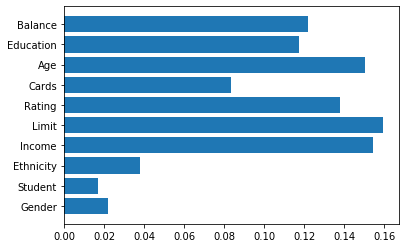

In [84]:
plt.barh(X.columns,model.feature_importances_)